In [20]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 50)

In [21]:
merged_sample = pd.read_csv('../preprocessed_data.csv')
merged_sample.head(5)

MemoryError: Unable to allocate 16.0 KiB for an array with shape (2048,) and data type int64

In [3]:
merged_sample_copy = merged_sample.copy()
train = merged_sample.drop(columns=['covid_vaccination'])
test = merged_sample_copy[['covid_vaccination']]
train.head()

,Unnamed: 0,Unnamed: 0.1,ID,auth_3mth_post_acute_dia,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,...,auth_3mth_post_acute_end,auth_3mth_acute_mus,atlas_perpov_1980_0711,atlas_pct_laccess_white15,auth_3mth_post_acute_mean_los,rx_gpi2_66_pmpm_ct,auth_3mth_acute_gus,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4,atlas_low_education_2015_update,race_cd
0,0,0.000011,0.703111,1.0,0.0,0.126735,0.073774,1.00,0.589117,1.0,...,0.0,0.5,0.0,0.213041,0.0,0.0,0.0,0.181818,1.0,0.166667
1,1,0.000014,0.774533,1.0,0.0,0.128916,0.157680,0.00,0.267096,1.0,...,0.0,0.5,0.0,0.249147,0.0,0.0,0.0,0.000000,0.0,0.166667
2,2,0.000017,0.946569,1.0,0.0,0.037677,0.017380,0.72,0.667433,1.0,...,0.0,0.5,0.0,0.093572,0.0,0.0,0.0,0.181818,0.0,0.166667
3,3,0.000019,0.108334,1.0,0.0,0.128178,0.163629,1.00,0.421612,1.0,...,0.0,0.5,0.0,0.042705,0.0,0.0,0.0,1.000000,0.0,0.000000
4,4,0.000024,0.502195,1.0,0.0,0.231772,0.158584,0.90,0.219840,1.0,...,0.0,0.5,0.0,0.182321,0.0,0.0,0.0,0.181818,0.0,0.166667


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=0)

In [5]:
y_train.value_counts()

covid_vaccination
0                    118838
1                    118396
dtype: int64

In [6]:
y_test['covid_vaccination'].value_counts()

1    51057
0    50615
Name: covid_vaccination, dtype: int64

In [7]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
preds=clf.predict(x_test)



In [8]:
import numpy
print(numpy.unique(preds))
preds
print(numpy.count_nonzero(preds == 1))
print(numpy.count_nonzero(preds == 0))
print(numpy.size)
y_test['covid_vaccination'].value_counts()

[0 1]
51056
50616
<function size at 0x000001DCFA929B80>


1    51057
0    50615
Name: covid_vaccination, dtype: int64

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
def elavutaionmetrix(x_train,y_train,y_test, preds):
    print(classification_report(y_test,preds))
    print("train accuracy:",clf.score(x_train,y_train))
    print("Test accuracy:",accuracy_score(y_test, preds))

In [10]:
elavutaionmetrix(x_train,y_train,y_test, preds)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50615
           1       1.00      1.00      1.00     51057

    accuracy                           1.00    101672
   macro avg       1.00      1.00      1.00    101672
weighted avg       1.00      1.00      1.00    101672

train accuracy: 0.9999747085156427
Test accuracy: 0.9999901644503895


In [11]:
from sklearn import metrics
def printroccurve(y_test,  preds):
    fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
    auc = metrics.roc_auc_score(y_test, preds)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

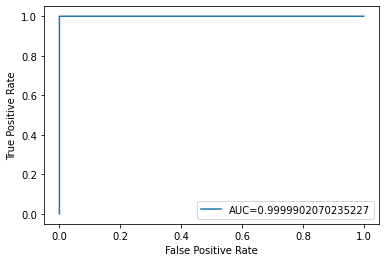

In [12]:
printroccurve(y_test,  preds)

In [15]:

testdataframe=pd.read_csv('preprocessed_holdout.csv', error_bad_lines=False)


In [16]:
preds=clf.predict(testdataframe)
#merging input data with prediction
testdataframe['covid_vaccination'] = preds


In [17]:
testdataframe.head(5)


,Unnamed: 0,Unnamed: 0.1,ID,auth_3mth_post_acute_dia,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,...,auth_3mth_acute_mus,atlas_perpov_1980_0711,atlas_pct_laccess_white15,auth_3mth_post_acute_mean_los,rx_gpi2_66_pmpm_ct,auth_3mth_acute_gus,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4,atlas_low_education_2015_update,race_cd,covid_vaccination
0,0,0.000000,0.230887,1.0,0.0,0.312471,0.215479,1.000,0.667385,1.0,...,0.0,0.0,0.134610,0.0,0.122222,0.0,0.000000,0.0,0.166667,1
1,1,0.000002,0.022477,1.0,0.0,0.201069,0.123538,0.750,0.238155,1.0,...,0.0,0.0,0.383749,0.0,0.000000,0.0,0.818182,0.0,0.166667,1
2,2,0.000004,0.046047,1.0,0.0,0.196946,0.174766,0.850,0.260679,1.0,...,0.0,0.0,0.404128,0.0,0.000000,0.0,0.909091,0.0,0.166667,1
3,3,0.000006,0.510482,1.0,0.0,0.039948,0.000000,1.000,0.647397,1.0,...,0.0,0.0,0.040439,0.0,0.000000,0.0,0.363636,0.0,0.166667,1
4,4,0.000008,0.176064,1.0,0.0,0.257079,0.100361,0.875,0.615091,1.0,...,0.0,0.0,0.132144,0.0,0.000000,0.0,0.000000,0.0,0.166667,1


In [18]:
testdataframe['covid_vaccination'].value_counts()


0    355712
1    169446
Name: covid_vaccination, dtype: int64

In [19]:
testdataframe.to_csv("svm_holdout.csv")